<a href="https://colab.research.google.com/github/gabilodeau/INF6804/blob/master/PoseNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INF6804 Vision par ordinateur

Polytechnique Montréal

Author: Soufiane Lamghari


Description : This notebook implements PoseNet model for human pose estimation in inference, using mobilenet_v1_101 as the backbone network. In this example, we predict human poses for some sample images.

Import libraries

In [2]:
import cv2
import time
import os
import torch
from google.colab.patches import cv2_imshow
from skimage import io
import numpy as np
from PIL import Image
import urllib

Cloning the github repo

In [3]:
!git clone https://github.com/rwightman/posenet-pytorch.git
%cd posenet-pytorch/
import posenet

Cloning into 'posenet-pytorch'...
remote: Enumerating objects: 115, done.
remote: Total 115 (delta 0), reused 0 (delta 0), pack-reused 115
Receiving objects: 100% (115/115), 34.73 KiB | 6.95 MiB/s, done.
Resolving deltas: 100% (62/62), done.
/content/posenet-pytorch


Load the model, the backbone is mobilenet_v1_101.

In [6]:
model = posenet.load_model(101)
model = model.cuda()
output_stride = model.output_stride

Get images (here from the github of INF6804 course) and transform them as torch tensors. Then get the predictions and display the predicted poses.

/content/posenet-pytorch/posenet/decode_multi.py:31: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  max_loc_idx = max_loc.nonzero()


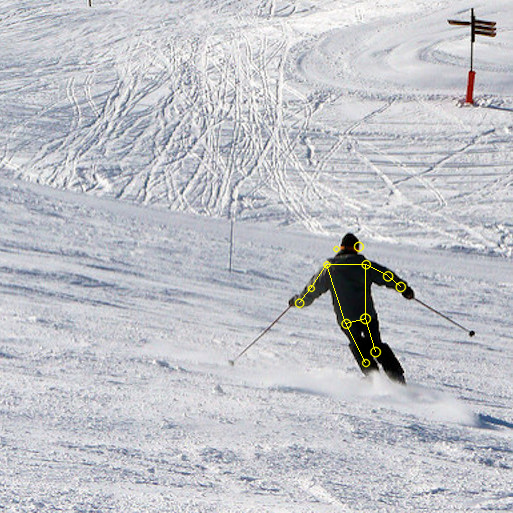

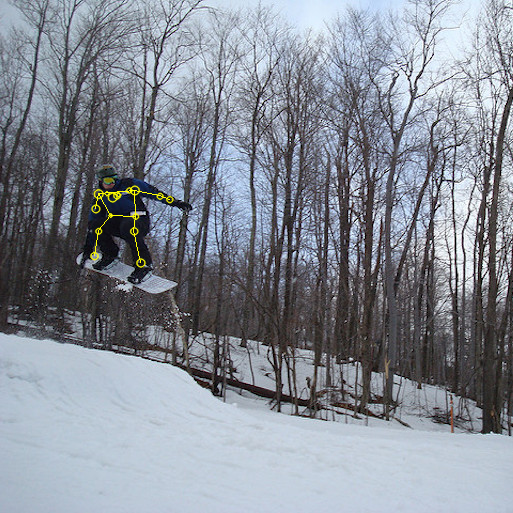

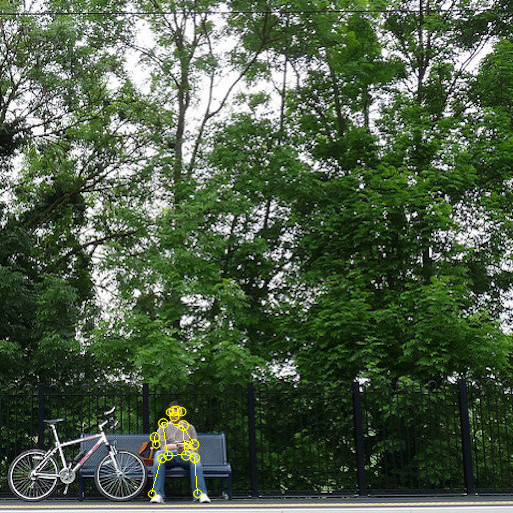

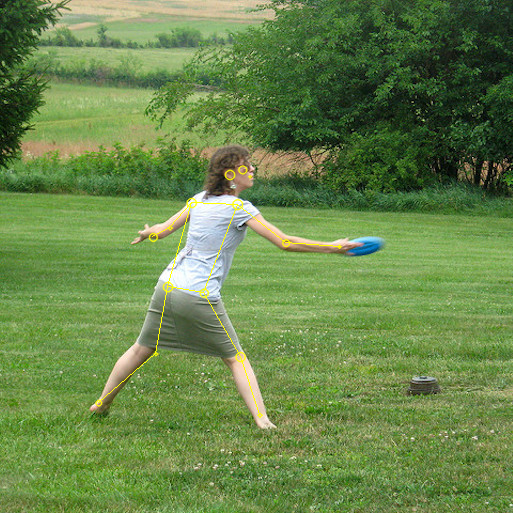

In [7]:
source = 'https://raw.githubusercontent.com/gabilodeau/INF6804/master/images'

examples = ['skiing.jpg', 'snowboard.jpg', 'person_bench.jpg', 'frisbee.jpg']

for img_name in examples:
  
  # Load test images
  input_image = io.imread(os.path.join(source, img_name))

  input_image, draw_image, output_scale = posenet.utils._process_input(input_image)

  with torch.no_grad():
      input_image = torch.Tensor(input_image).cuda()

      heatmaps_result, offsets_result, displacement_fwd_result, displacement_bwd_result = model(input_image)

      pose_scores, keypoint_scores, keypoint_coords = posenet.decode_multiple_poses(
          heatmaps_result.squeeze(0),
          offsets_result.squeeze(0),
          displacement_fwd_result.squeeze(0),
          displacement_bwd_result.squeeze(0),
          output_stride=output_stride,
          max_pose_detections=10,
          min_pose_score=0.25)

  keypoint_coords *= output_scale

  draw_image = posenet.draw_skel_and_kp(draw_image, pose_scores, keypoint_scores, keypoint_coords, min_pose_score=0.25, min_part_score=0.25)

  cv2_imshow(draw_image[...,::-1])


**References:**

 - https://github.com/rwightman/posenet-pytorch

 - [PoseNet: A Convolutional Network for Real-Time 6-DOF Camera Relocalization paper](https://arxiv.org/abs/1505.07427)